In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [2]:
training_data = pd.read_csv('news_train.csv', encoding='utf-8').astype(str)

In [3]:
testing_data = pd.read_csv('news_test.csv', encoding='utf-8').astype(str)


In [4]:
training_data.isnull().sum()

category    0
headline    0
dtype: int64

In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160735 entries, 0 to 160734
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   category  160735 non-null  object
 1   headline  160735 non-null  object
dtypes: object(2)
memory usage: 2.5+ MB


In [6]:
training_dummies = pd.get_dummies(training_data['category'])

In [7]:
training_dummies

,ARTS,ARTS & CULTURE,BLACK VOICES,BUSINESS,COLLEGE,COMEDY,CRIME,CULTURE & ARTS,DIVORCE,EDUCATION,...,TASTE,TECH,THE WORLDPOST,TRAVEL,WEDDINGS,WEIRD NEWS,WELLNESS,WOMEN,WORLD NEWS,WORLDPOST
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160730,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
160731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160732,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
training_data = training_data.drop('category', axis = 1)

In [9]:
len(training_data)

160735

In [10]:
training_data = pd.concat([training_data, training_dummies], axis=1)

In [11]:
training_data.shape

(160735, 42)

In [12]:
training_features = training_data['headline']

In [13]:
training_labels = training_data.drop('headline', axis=1)

In [14]:
training_features.shape

(160735,)

In [15]:
training_labels.shape

(160735, 41)

In [16]:
testing_data.columns

Index(['id', 'category', 'headline', 'authors', 'link', 'short_description',
       'date'],
      dtype='object')

In [17]:
testing_data = testing_data.drop(['id', 'authors', 'link', 'short_description','date'], axis=1)

In [18]:
testing_dummies = pd.get_dummies(testing_data['category'])

In [19]:
len(testing_data)

40118

In [20]:
testing_data = pd.concat([testing_data, testing_dummies], axis=1)

In [21]:
testing_data

,category,headline,ARTS,ARTS & CULTURE,BLACK VOICES,BUSINESS,COLLEGE,COMEDY,CRIME,CULTURE & ARTS,...,TASTE,TECH,THE WORLDPOST,TRAVEL,WEDDINGS,WEIRD NEWS,WELLNESS,WOMEN,WORLD NEWS,WORLDPOST
0,ENTERTAINMENT,Mike Myers Reveals He'd 'Like To' Do A Fourth ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,POLITICS,Ryan Zinke Looks To Reel Back Some Critics Wit...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,POLITICS,Trump's Scottish Golf Resort Pays Women Signif...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,WEIRD NEWS,Weird Father's Day Gifts Your Dad Doesn't Know...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,ENTERTAINMENT,"Kanye West Spent $85,000 On Photo Of Whitney H...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40113,ENVIRONMENT,Green Activists: 50 And Older,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40114,BUSINESS,Four More Bank Closures Mark the Week of Janua...,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40115,BUSINESS,Walmart Waving Goodbye To Some Greeters,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40116,ENTERTAINMENT,'Girl With the Dragon Tattoo' India Release Ca...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
testing_data = testing_data.drop('category', axis=1)

In [23]:
testing_data

,headline,ARTS,ARTS & CULTURE,BLACK VOICES,BUSINESS,COLLEGE,COMEDY,CRIME,CULTURE & ARTS,DIVORCE,...,TASTE,TECH,THE WORLDPOST,TRAVEL,WEDDINGS,WEIRD NEWS,WELLNESS,WOMEN,WORLD NEWS,WORLDPOST
0,Mike Myers Reveals He'd 'Like To' Do A Fourth ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ryan Zinke Looks To Reel Back Some Critics Wit...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Trump's Scottish Golf Resort Pays Women Signif...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Weird Father's Day Gifts Your Dad Doesn't Know...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,"Kanye West Spent $85,000 On Photo Of Whitney H...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40113,Green Activists: 50 And Older,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40114,Four More Bank Closures Mark the Week of Janua...,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40115,Walmart Waving Goodbye To Some Greeters,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40116,'Girl With the Dragon Tattoo' India Release Ca...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
testing_data

,headline,ARTS,ARTS & CULTURE,BLACK VOICES,BUSINESS,COLLEGE,COMEDY,CRIME,CULTURE & ARTS,DIVORCE,...,TASTE,TECH,THE WORLDPOST,TRAVEL,WEDDINGS,WEIRD NEWS,WELLNESS,WOMEN,WORLD NEWS,WORLDPOST
0,Mike Myers Reveals He'd 'Like To' Do A Fourth ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ryan Zinke Looks To Reel Back Some Critics Wit...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Trump's Scottish Golf Resort Pays Women Signif...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Weird Father's Day Gifts Your Dad Doesn't Know...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,"Kanye West Spent $85,000 On Photo Of Whitney H...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40113,Green Activists: 50 And Older,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40114,Four More Bank Closures Mark the Week of Janua...,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40115,Walmart Waving Goodbye To Some Greeters,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40116,'Girl With the Dragon Tattoo' India Release Ca...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
testing_features = testing_data['headline']

In [26]:
testing_labels = testing_data.drop('headline', axis=1)

In [27]:
testing_features

0        Mike Myers Reveals He'd 'Like To' Do A Fourth ...
1        Ryan Zinke Looks To Reel Back Some Critics Wit...
2        Trump's Scottish Golf Resort Pays Women Signif...
3        Weird Father's Day Gifts Your Dad Doesn't Know...
4        Kanye West Spent $85,000 On Photo Of Whitney H...
                               ...                        
40113                        Green Activists: 50 And Older
40114    Four More Bank Closures Mark the Week of Janua...
40115              Walmart Waving Goodbye To Some Greeters
40116    'Girl With the Dragon Tattoo' India Release Ca...
40117                        Good Games -- Is It possible?
Name: headline, Length: 40118, dtype: object

In [28]:
testing_labels


,ARTS,ARTS & CULTURE,BLACK VOICES,BUSINESS,COLLEGE,COMEDY,CRIME,CULTURE & ARTS,DIVORCE,EDUCATION,...,TASTE,TECH,THE WORLDPOST,TRAVEL,WEDDINGS,WEIRD NEWS,WELLNESS,WOMEN,WORLD NEWS,WORLDPOST
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40114,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40115,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
training_features

0         There Were 2 Mass Shootings In Texas Last Week...
1         Will Smith Joins Diplo And Nicky Jam For The 2...
2           Hugh Grant Marries For The First Time At Age 57
3         Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4         Julianna Margulies Uses Donald Trump Poop Bags...
                                ...                        
160730    RIM CEO Thorsten Heins' 'Significant' Plans Fo...
160731    Maria Sharapova Stunned By Victoria Azarenka I...
160732    Giants Over Patriots, Jets Over Colts Among  M...
160733    Aldon Smith Arrested: 49ers Linebacker Busted ...
160734    Dwight Howard Rips Teammates After Magic Loss ...
Name: headline, Length: 160735, dtype: object

In [30]:
training_labels.isnull().sum()

ARTS              0
ARTS & CULTURE    0
BLACK VOICES      0
BUSINESS          0
COLLEGE           0
COMEDY            0
CRIME             0
CULTURE & ARTS    0
DIVORCE           0
EDUCATION         0
ENTERTAINMENT     0
ENVIRONMENT       0
FIFTY             0
FOOD & DRINK      0
GOOD NEWS         0
GREEN             0
HEALTHY LIVING    0
HOME & LIVING     0
IMPACT            0
LATINO VOICES     0
MEDIA             0
MONEY             0
PARENTING         0
PARENTS           0
POLITICS          0
QUEER VOICES      0
RELIGION          0
SCIENCE           0
SPORTS            0
STYLE             0
STYLE & BEAUTY    0
TASTE             0
TECH              0
THE WORLDPOST     0
TRAVEL            0
WEDDINGS          0
WEIRD NEWS        0
WELLNESS          0
WOMEN             0
WORLD NEWS        0
WORLDPOST         0
dtype: int64

In [31]:
testing_features

0        Mike Myers Reveals He'd 'Like To' Do A Fourth ...
1        Ryan Zinke Looks To Reel Back Some Critics Wit...
2        Trump's Scottish Golf Resort Pays Women Signif...
3        Weird Father's Day Gifts Your Dad Doesn't Know...
4        Kanye West Spent $85,000 On Photo Of Whitney H...
                               ...                        
40113                        Green Activists: 50 And Older
40114    Four More Bank Closures Mark the Week of Janua...
40115              Walmart Waving Goodbye To Some Greeters
40116    'Girl With the Dragon Tattoo' India Release Ca...
40117                        Good Games -- Is It possible?
Name: headline, Length: 40118, dtype: object

In [32]:
testing_labels.isnull().sum()

ARTS              0
ARTS & CULTURE    0
BLACK VOICES      0
BUSINESS          0
COLLEGE           0
COMEDY            0
CRIME             0
CULTURE & ARTS    0
DIVORCE           0
EDUCATION         0
ENTERTAINMENT     0
ENVIRONMENT       0
FIFTY             0
FOOD & DRINK      0
GOOD NEWS         0
GREEN             0
HEALTHY LIVING    0
HOME & LIVING     0
IMPACT            0
LATINO VOICES     0
MEDIA             0
MONEY             0
PARENTING         0
PARENTS           0
POLITICS          0
QUEER VOICES      0
RELIGION          0
SCIENCE           0
SPORTS            0
STYLE             0
STYLE & BEAUTY    0
TASTE             0
TECH              0
THE WORLDPOST     0
TRAVEL            0
WEDDINGS          0
WEIRD NEWS        0
WELLNESS          0
WOMEN             0
WORLD NEWS        0
WORLDPOST         0
dtype: int64

In [33]:
training_labels.shape

(160735, 41)

In [34]:
testing_labels.shape

(40118, 41)

In [35]:
training_features.shape

(160735,)

In [36]:
testing_features.shape

(40118,)

In [37]:
from tensorflow import keras

In [38]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [39]:
tokenizer = Tokenizer(num_words=68080, oov_token='<OOV>')

In [40]:
tokenizer.fit_on_texts(training_features)

In [41]:
word_index = tokenizer.word_index

In [42]:
len(word_index)

68080

In [43]:
training_sequences = tokenizer.texts_to_sequences(training_features)

In [44]:
training_sequences

[[376, 366, 156, 1037, 2394, 6, 419, 240, 79, 87, 276, 187, 10, 297],
 [35, 1119, 1786, 22752, 8, 14542, 4208, 7, 2, 1521, 70, 22753, 795, 739],
 [3884, 5410, 4676, 7, 2, 65, 72, 18, 458, 9582],
 [2028, 8116, 1921, 36603, 1531, 12556, 8, 305, 6, 17, 6264],
 [27505, 22754, 823, 31, 15, 5411, 2921, 3, 824, 38, 29, 46, 325],
 [2573, 8759, 15852, 26, 293, 1000, 428, 76, 6428, 1202],
 [31, 15, 9, 11072, 17, 1973, 15853, 6, 5668, 989, 2627],
 [23, 3, 109, 10, 1332, 1909, 5802, 17, 20, 79],
 [23, 3, 109, 10, 8117, 5802, 17, 20, 79],
 [717, 2889, 2437, 419, 140, 263, 625],
 [378, 1937, 151, 1480, 237, 4347, 341, 2861, 775, 3, 307, 15, 2420],
 [11, 176, 115, 4, 60, 18, 374, 20, 4582, 6621, 1146, 5202, 895, 6, 5958],
 [71, 3102, 10, 1522, 182, 1203, 34, 78, 6, 36, 825, 22755, 970],
 [27506,
  335,
  69,
  24,
  19705,
  800,
  15854,
  36604,
  4,
  1128,
  4144,
  50,
  1165,
  11,
  15,
  1033],
 [4677, 5528, 716, 83, 55, 15, 1231, 34, 84, 3692, 1128],
 [27507, 93, 1471, 1716, 1985, 71, 27508,

In [45]:
training_padded = pad_sequences(training_sequences, padding='post')

In [46]:
training_padded

array([[  376,   366,   156, ...,     0,     0,     0],
       [   35,  1119,  1786, ...,     0,     0,     0],
       [ 3884,  5410,  4676, ...,     0,     0,     0],
       ...,
       [ 3551,    51,  4644, ...,     0,     0,     0],
       [26832,  1119,   618, ...,     0,     0,     0],
       [14138,  3449,  1644, ...,     0,     0,     0]])

In [47]:
testing_sequences = tokenizer.texts_to_sequences(testing_features)

In [48]:
testing_padded = pad_sequences(testing_sequences, padding='post')

In [49]:
training_padded.shape

(160735, 53)

In [50]:
testing_padded.shape

(40118, 38)

In [51]:
from tensorflow.keras.models import Sequential

In [52]:
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D,Dense,LSTM,Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

In [53]:
earlystop = EarlyStopping(monitor='val_loss', patience=2)

In [54]:
model =Sequential()

In [55]:
model.add(Embedding(68080, 32, input_length =53 ))

In [56]:
model.add(Bidirectional(LSTM(32)))

In [57]:
model.add(Dense(32, activation='relu', kernel_regularizer= 'l2'))

In [58]:
model.add(Dense(16, activation='relu', kernel_regularizer= 'l2'))

In [59]:
model.add(Dense(8, activation='relu', kernel_regularizer= 'l2'))

In [60]:
model.add(Dense(41, activation='softmax'))

In [61]:
model.compile(loss= 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [62]:
num_epochs = 25

In [63]:

history = model.fit(training_padded, training_labels, epochs= num_epochs, validation_data=(testing_padded, testing_labels), verbose=2, callbacks=[earlystop])

Epoch 1/25
5023/5023 - 226s - loss: 3.0948 - accuracy: 0.1921 - val_loss: 2.9296 - val_accuracy: 0.2400
Epoch 2/25
5023/5023 - 225s - loss: 2.7877 - accuracy: 0.2673 - val_loss: 2.7644 - val_accuracy: 0.2847
Epoch 3/25
5023/5023 - 216s - loss: 2.6135 - accuracy: 0.3087 - val_loss: 2.7375 - val_accuracy: 0.2989
Epoch 4/25
5023/5023 - 223s - loss: 2.4898 - accuracy: 0.3328 - val_loss: 2.7529 - val_accuracy: 0.3022
Epoch 5/25
5023/5023 - 225s - loss: 2.3964 - accuracy: 0.3502 - val_loss: 2.7875 - val_accuracy: 0.3069


In [64]:
losses = pd.DataFrame(model.history.history)

In [65]:
losses

,loss,accuracy,val_loss,val_accuracy
0,3.094808,0.192105,2.929554,0.240017
1,2.787709,0.267291,2.764415,0.284685
2,2.613504,0.308738,2.737454,0.298918
3,2.489759,0.332802,2.752904,0.302233
4,2.396436,0.350185,2.787535,0.306920


In [66]:
accuracy = losses[['accuracy', 'val_accuracy']]

<AxesSubplot:>

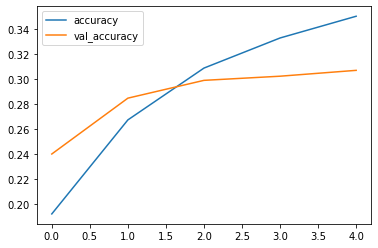

In [67]:
accuracy.plot()

In [68]:
loss = losses[['loss', 'val_loss']]

<AxesSubplot:>

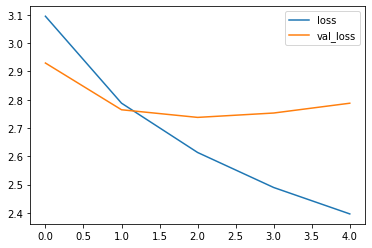

In [69]:
loss.plot()

In [70]:
model.save('sentiment_with_kaggle.h5')